In [37]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
from datetime import datetime
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization

In [8]:
len(glob('train/*.jpg'))

4000

In [9]:
dt = plt.imread(glob('train/*.jpg')[1])

In [10]:
dt.shape

(280, 300, 3)

In [16]:
dt1 = cv2.resize(dt,(300,300))

In [17]:
dt1.shape

(300, 300, 3)

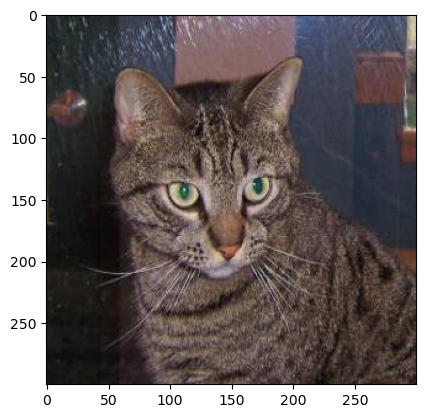

In [18]:
plt.imshow(dt1)

In [19]:
####################################################################################

In [21]:
file_list = glob('train/*.jpg')

In [22]:
x1 = np.random.randn(300,300,3)
x2 = np.random.randn(300,300,3)
x = np.r_[[x1],[x2]]
x.shape

(2, 300, 300, 3)

In [30]:
# ''' 한참 걸리는 코드
# curr = datetime.datetime.now()
# dog_cat = np.zeros((1,300,300,3))
# dog_cat_type = []
# for file in file_list:
#     dt = plt.imread(file)
#     dt = cv2.resize(dt,(300,300))
#     dog_cat = np.r_[dog_cat,[dt]]
#     if file in 'cat':
#         dog_cat_type.append(0)
#     else: 
#         dog_cat_type.append(1)
# ed = datetime.now()
# ed - st
# '''

In [32]:
# # st = datetime.now()
# dog_cat = np.zeros((len(file_list),300,300,3))
# dog_cat_type = []
# for i,file in enumerate(file_list):
#     dt = plt.imread(file)
#     dt = cv2.resize(dt,(300,300))
#     dog_cat[i] = dt 
#     if 'cat' in file:
#         dog_cat_type.append(0)
#     else: 
#         dog_cat_type.append(1)
# ed = datetime.now()
# ed - st

# 얘는 얼마 안걸림

In [31]:
########################################################################

In [34]:
dog_cat = np.zeros((len(file_list),300,300,3))
dog_cat_type = []
for i,file in enumerate(file_list):
    dt = plt.imread(file)
    dt = cv2.resize(dt,(300,300))
    dog_cat[i] = dt 
    if 'cat' in file:
        dog_cat_type.append(0)
    else: 
        dog_cat_type.append(1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(dog_cat,dog_cat_type)

In [40]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

array([0])

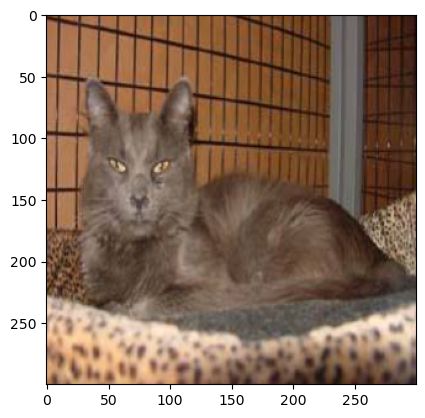

In [41]:
plt.imshow(X_train[0].astype('int'))
y_train[0]

In [49]:
model = Sequential(
    [
        Conv2D(30,(5,5),activation='relu',input_shape=(300,300,3)),
        BatchNormalization(),
        MaxPooling2D((5,5)),
        Conv2D(50,(3,3),activation='relu'),
        BatchNormalization(),
        MaxPooling2D((5,5)),
        Flatten(),
        Dense(64,activation='relu'),
        Dropout(0.5),
        Dense(1,activation='sigmoid')
    ]
)

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 296, 296, 30)      2280      
                                                                 
 batch_normalization_3 (Batc  (None, 296, 296, 30)     120       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 59, 59, 30)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 57, 57, 50)        13550     
                                                                 
 batch_normalization_4 (Batc  (None, 57, 57, 50)       200       
 hNormalization)                                                 
                                                        

In [50]:
opt = 'adam'
loss = 'binary_crossentropy'
model.compile(optimizer=opt,
             loss=loss,
             metrics=['accuracy'])

In [51]:
model.fit(X_train,
         y_train,
         epochs=20,
         batch_size=128)

Epoch 1/20
24/24 [==============================] - 135s 5s/step - loss: 1.1579 - accuracy: 0.5047
Epoch 2/20
24/24 [==============================] - 118s 5s/step - loss: 0.6818 - accuracy: 0.4973
Epoch 3/20
24/24 [==============================] - 117s 5s/step - loss: 0.6853 - accuracy: 0.5417
Epoch 4/20
24/24 [==============================] - 118s 5s/step - loss: 0.6698 - accuracy: 0.5713
Epoch 5/20
24/24 [==============================] - 116s 5s/step - loss: 0.6697 - accuracy: 0.5890
Epoch 6/20
24/24 [==============================] - 117s 5s/step - loss: 0.6557 - accuracy: 0.6020
Epoch 7/20
24/24 [==============================] - 117s 5s/step - loss: 0.6506 - accuracy: 0.6293
Epoch 8/20
24/24 [==============================] - 117s 5s/step - loss: 0.6289 - accuracy: 0.6457
Epoch 9/20
24/24 [==============================] - 117s 5s/step - loss: 0.6031 - accuracy: 0.6630
Epoch 10/20
24/24 [==============================] - 118s 5s/step - loss: 0.5804 - accuracy: 0.6840
Epoch 11/

In [ ]:
from tensorflow.keras.applications import VGG16

In [52]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # 

In [54]:
from tensorflow.keras.applications import VGG16

In [55]:
conv= VGG16(include_top=False,
            weights='imagenet',
            input_shape=(150,150,3),)

58889256/58889256 [==============================] - 15s 0us/step


In [56]:
conv.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     